# Time series classification/ anomaly detection

This notebook aims to develop a thorough understanding of the data and to extract and visualize key insights for subsequent analyses.

## Table of contents

1. Setup & Imports
2. Feature Engineering


## Setup & Imports

In [1]:
# Packages
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from utils.data_loader import DataLoader
from utils.calculate_indices import CalculateIndices
from utils.basic_analysis import BasicDataAnalysis
from utils.visualization_histogram import HistogramDataVisualization
from utils.time_series_aggregate import TimeSeriesAggregate
from utils.visualization_spectral import SpectralBandPlotter
from utils.correlation_analysis import CorrelationAnalysis
from utils.visualization_time_series import plot_date_diff_distribution
from utils.sits_outlier_cleaner import SITSOutlierCleaner
from utils.analysis_disturbed import DisturbedYearAnalysis
from utils.visualization_function import (
    plot_intervals_timestamps,
    plot_top_correlations,
    plot_autocorrelation,
    plot_band_differences,
)
from utils.visualization_anomaly_detection import (
    plot_with_outliers_subplot,
    plot_outlier_detection_grid,
)
from utils.constants import spectral_bands, indices

## Load Dataset

In [2]:
dataloader = DataLoader()
df_base = dataloader.load_transform("../data/raw/raw_trainset.csv")

## Basic Dataset Analysis

In [3]:
basicanalysis = BasicDataAnalysis(df_base)
print(basicanalysis.get_dtypes())

time                datetime64[ns]
id                           int64
disturbance_year             int64
doy                          int64
b2                           int64
b3                           int64
b4                           int64
b5                           int64
b6                           int64
b7                           int64
b8                           int64
b8a                          int64
b11                          int64
b12                          int64
species                     object
dtype: object


In [4]:
print("Number of rows:", basicanalysis.get_num_rows())
print("Number of columns:", basicanalysis.get_num_cols())
print("Unique IDs:", basicanalysis.get_unique_count("id"))
print("Unique species:", basicanalysis.get_unique_count("species"))
print("Earliest time:", basicanalysis.get_min("time"))
print("Latest time:", basicanalysis.get_max("time"))
print("Is id + species unique?", basicanalysis.check_id_species_uniqueness())

Number of rows: 4074354
Number of columns: 15
Unique IDs: 28212
Unique species: 7
Earliest time: 2017-01-01 00:00:00
Latest time: 2022-11-02 00:00:00
Is id + species unique? True


In [5]:
basicanalysis.get_description()

,time,id,disturbance_year,doy,b2,b3,b4,b5,b6,b7,b8,b8a,b11,b12
count,4074354,4.074354e+06,4.074354e+06,4.074354e+06,4.074354e+06,4.074354e+06,4.074354e+06,4.074354e+06,4.074354e+06,4.074354e+06,4.074354e+06,4.074354e+06,4.074354e+06,4.074354e+06
mean,2020-02-05 05:16:36.360551936,1.408675e+04,2.522988e+02,1.763385e+02,2.726073e+02,4.309495e+02,3.465769e+02,6.764691e+02,1.683092e+03,2.040237e+03,2.166979e+03,2.290828e+03,1.158527e+03,6.015298e+02
min,2017-01-01 00:00:00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,2018-09-24 00:00:00,7.038000e+03,0.000000e+00,1.060000e+02,1.560000e+02,2.810000e+02,1.750000e+02,4.600000e+02,1.268000e+03,1.529000e+03,1.629000e+03,1.741000e+03,7.300000e+02,3.360000e+02
50%,2020-03-15 00:00:00,1.406300e+04,0.000000e+00,1.760000e+02,2.230000e+02,3.710000e+02,2.570000e+02,5.880000e+02,1.547000e+03,1.856000e+03,1.971000e+03,2.092000e+03,1.011000e+03,4.810000e+02
75%,2021-06-16 00:00:00,2.113300e+04,0.000000e+00,2.450000e+02,3.220000e+02,5.030000e+02,3.990000e+02,7.840000e+02,1.924000e+03,2.327000e+03,2.464000e+03,2.610000e+03,1.441000e+03,7.090000e+02
max,2022-11-02 00:00:00,2.821200e+04,2.020000e+03,3.660000e+02,2.008700e+04,1.753400e+04,1.752400e+04,1.794000e+04,1.982700e+04,2.143900e+04,2.181100e+04,2.469400e+04,1.855400e+04,1.758700e+04
std,NaN,8.145028e+03,6.675001e+02,8.521531e+01,2.202539e+02,2.602215e+02,3.086128e+02,3.482985e+02,6.457464e+02,8.024451e+02,8.532377e+02,8.597645e+02,6.092414e+02,4.196677e+02


In [6]:
basicanalysis.get_missing_counts()

,column_name,missing_count
0,time,0
1,id,0
2,disturbance_year,0
3,doy,0
4,b2,0
5,b3,0
6,b4,0
7,b5,0
8,b6,0
9,b7,0


## Feature Engineering

### Basic Feature Engineering

In [7]:
df = dataloader.feature_extraction(df_base)

### Datetime Feature Engineering

In [8]:
df = dataloader.date_feature_extraction(df)

### Advanced Feature Engineering

In [9]:
calcindices = CalculateIndices()
df = calcindices.add_all_indices(df)

## Exploratory Data Analysis

### Visualization of the base dataframe 

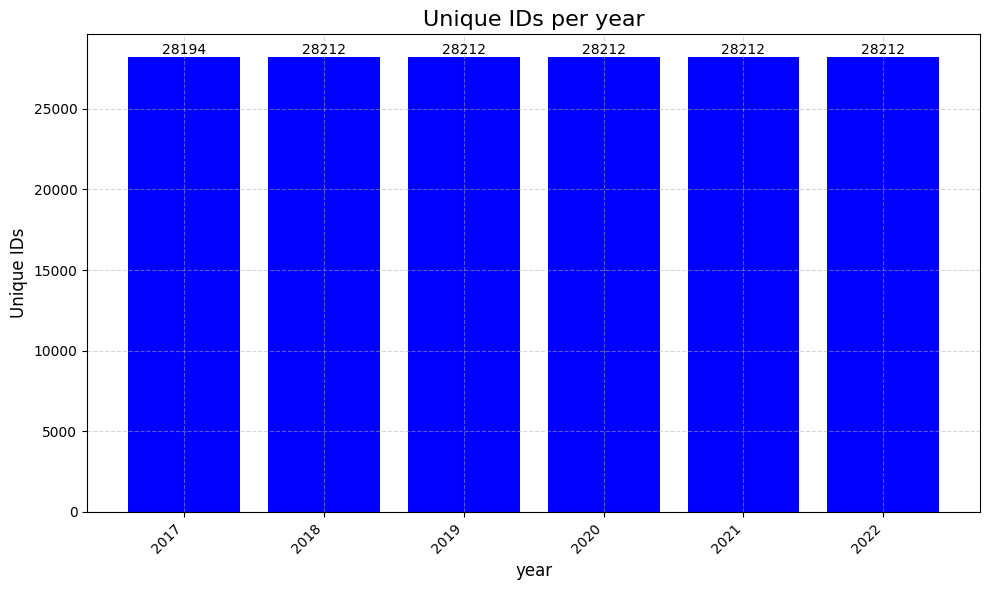

In [10]:
hist = HistogramDataVisualization(df)
hist.plot_unique_ids("year")

Die Vereteilung pber die Jahre Hinweg zeigt deutlich das die Höuifkeiten nur in einem sehr geringen BEreich schwanken. 

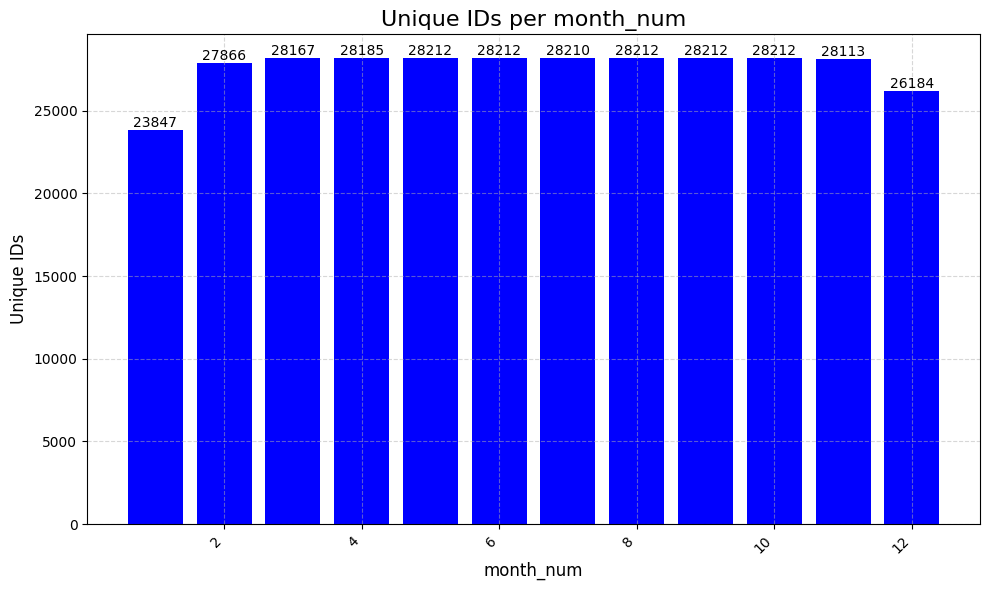

In [11]:
hist.plot_unique_ids("month_num")

Die Verteilung der Vorkommenden IDs zeigt das in den Wintermonaten Januar und Dezember im vergleich zu den anderen Monaten ein geringeres Vorkommen hat. Es wird vermutet das aufgrund des zuvor duchgefphrten Preprocessing mit dem ::: das viele WOlken Bilder entfertn wurden. Für die Spätere Anaylse gilt deshalb die aGGRAGTEION DER DATEN ein passender resample wert verwendet wird der weierhin aussage kraöftig bleibt.

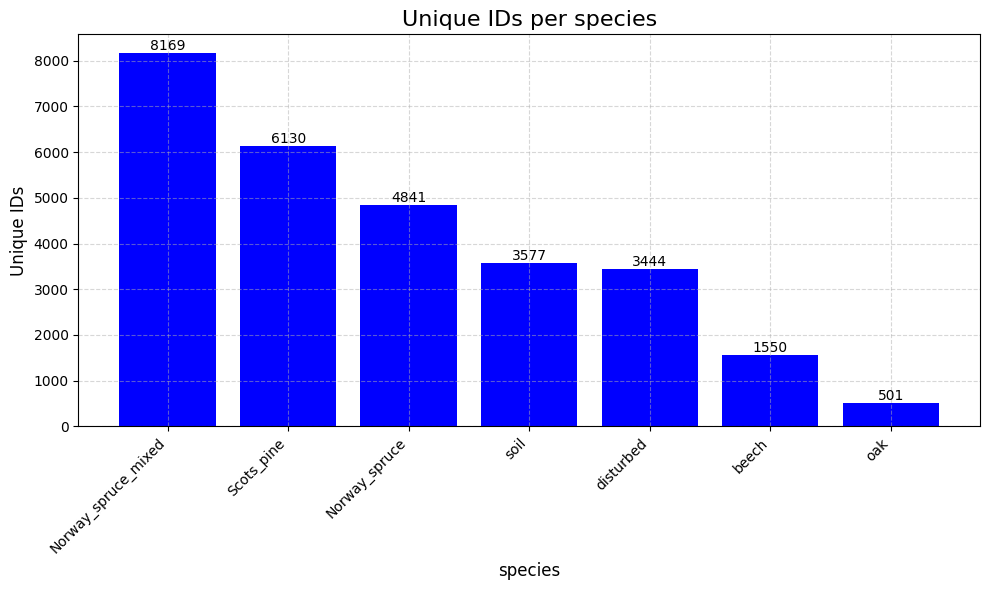

In [12]:
hist.plot_unique_ids("species")

The seven categories show a clear difference in their frequency of occurrence. In general, they represent five tree species (including a mixed category), one disturbed class, and one soil class.


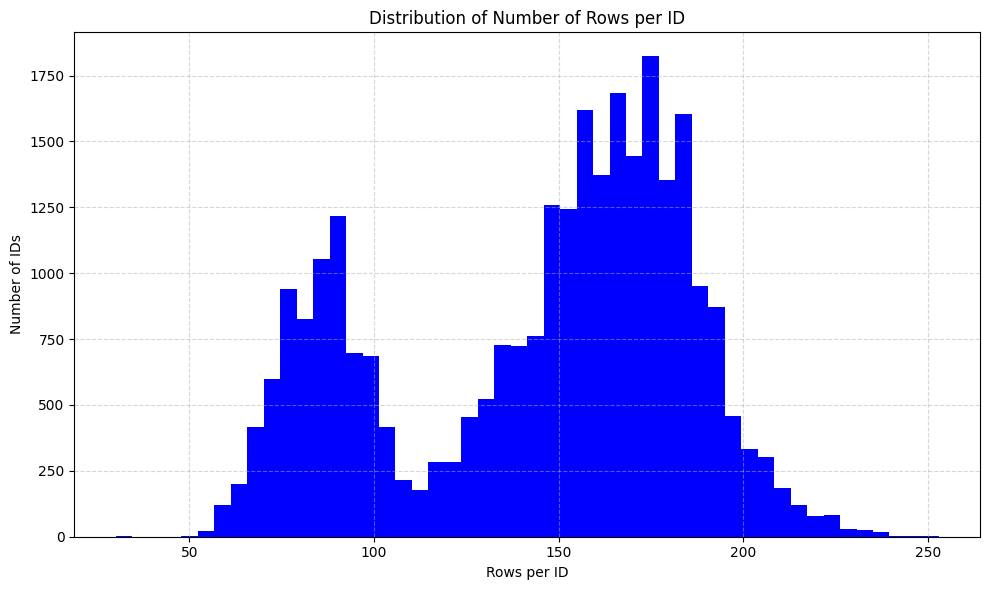

In [13]:
hist.plot_id_distribution()

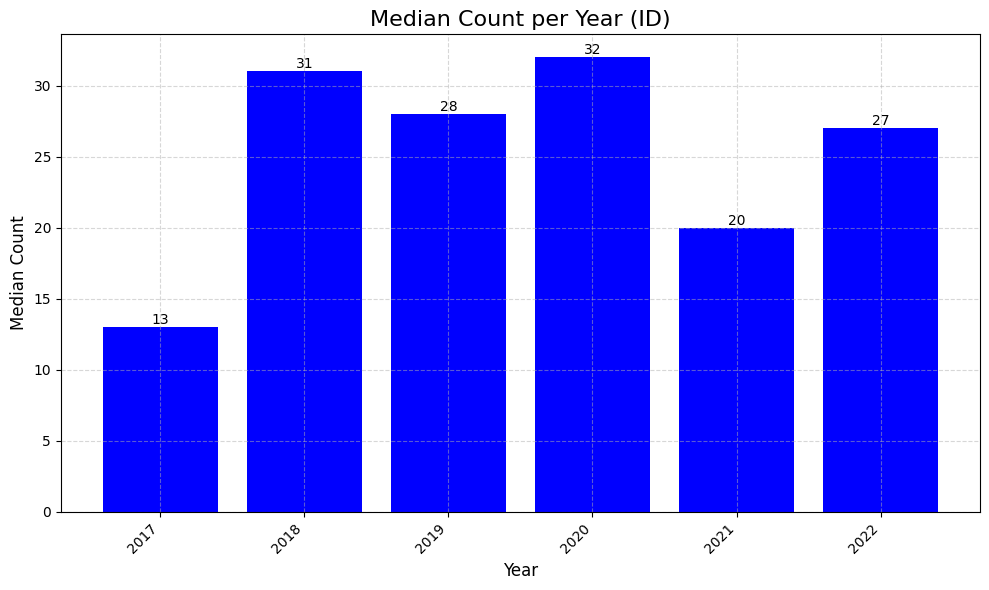

In [14]:
hist.plot_median_id_distribution()

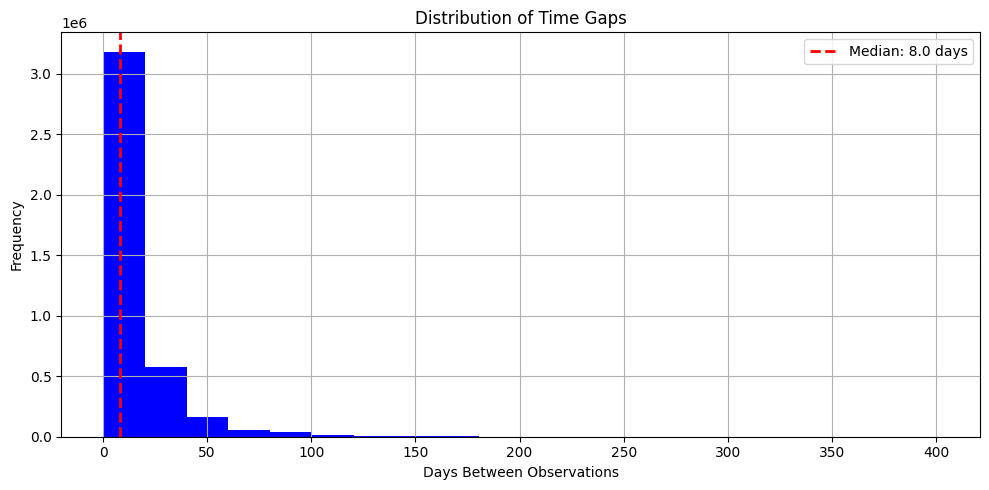

In [15]:
plot_date_diff_distribution(df)

Die Differenz der unterschiedlichen Time Gaos beträgt im MEdian 8 Tage hat aber eine hohe Varianz. Es zeigt sich das Zeitreihen nur selten vorkemmende VBeobachtungen haben.

### Correlation Analysis

In [16]:
correlation = CorrelationAnalysis(df)
corr_matrix = correlation.get_correlation_matrix()
corr_matrix

,id,disturbance_year,doy,b2,b3,b4,b5,b6,b7,b8,...,ndvi,gndvi,wdvi,tndvi,savi,ipvi,mcari,reip,masvi2,dvi
id,1.0000,-0.0092,-0.0004,-0.0075,-0.0070,-0.0076,-0.0066,-0.0020,-0.0008,0.0002,...,0.0061,0.0050,0.0016,0.0061,0.0061,0.0061,0.0014,0.0002,0.0010,0.0030
disturbance_year,-0.0092,1.0000,0.0002,0.0652,0.0489,0.1015,0.0720,-0.0533,-0.0703,-0.0646,...,-0.1703,-0.1375,-0.0857,-0.1618,-0.1703,-0.1703,-0.0539,-0.0109,0.0097,-0.1046
doy,-0.0004,0.0002,1.0000,-0.0588,-0.0431,-0.0806,-0.0696,0.0651,0.0873,0.0880,...,0.1736,0.1556,0.1060,0.1638,0.1736,0.1736,0.0563,0.0141,-0.0160,0.1209
b2,-0.0075,0.0652,-0.0588,1.0000,0.9416,0.9145,0.8335,0.3765,0.2819,0.2834,...,-0.7104,-0.7209,0.1220,-0.7148,-0.7103,-0.7104,-0.1119,-0.0414,-0.0648,-0.0490
b3,-0.0070,0.0489,-0.0431,0.9416,1.0000,0.9288,0.9437,0.5867,0.4888,0.4928,...,-0.6517,-0.6639,0.3357,-0.6564,-0.6516,-0.6517,-0.0107,-0.0417,-0.1098,0.1620
b4,-0.0076,0.1015,-0.0806,0.9145,0.9288,1.0000,0.9107,0.3609,0.2602,0.2673,...,-0.8183,-0.7528,0.0893,-0.8203,-0.8182,-0.8183,-0.1327,-0.0638,-0.0730,-0.0975
b5,-0.0066,0.0720,-0.0696,0.8335,0.9437,0.9107,1.0000,0.6510,0.5526,0.5561,...,-0.6363,-0.5877,0.4046,-0.6354,-0.6361,-0.6363,0.0543,-0.0573,-0.1359,0.2341
b6,-0.0020,-0.0533,0.0651,0.3765,0.5867,0.3609,0.6510,1.0000,0.9795,0.9703,...,0.0539,0.0612,0.9355,0.0467,0.0542,0.0539,0.3095,0.0096,-0.2130,0.8673
b7,-0.0008,-0.0703,0.0873,0.2819,0.4888,0.2602,0.5526,0.9795,1.0000,0.9818,...,0.1507,0.1717,0.9661,0.1417,0.1511,0.1507,0.3154,0.0082,-0.2118,0.9168
b8,0.0002,-0.0646,0.0880,0.2834,0.4928,0.2673,0.5561,0.9703,0.9818,1.0000,...,0.1485,0.1480,0.9836,0.1402,0.1489,0.1485,0.3084,0.0091,-0.2162,0.9330


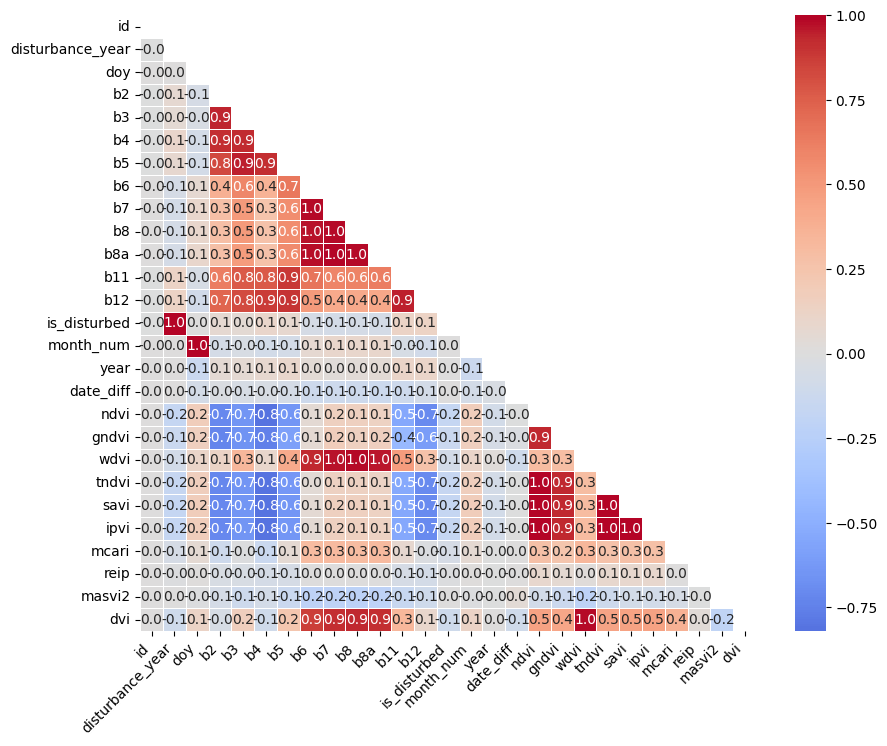

In [17]:
correlation.plot_correlation_matrix()

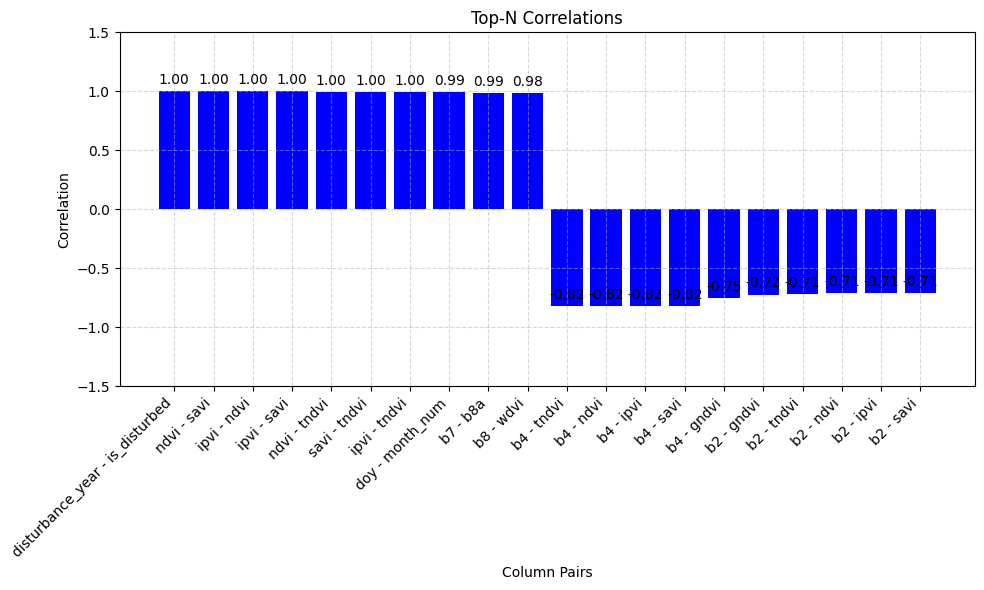

In [18]:
top_corr_df = correlation.get_top_correlations(top_n=10)
plot_top_correlations(top_corr_df)

Bei der Peason Correlation sehen wir starke Correlationen die sich zwischen den Idizies aufbauen was allerdings weniug aussagekröftig ist. Demnach gilt es mit anderen Methoden die wirklcihen zusammenhönge abzubilden.

### Analysis of Distrubed

In [19]:
analysis = DisturbedYearAnalysis(df)
analysis.summary_unique_years()

Number of unique values: 22
Unique values:
[   0 2018 2020 2014 2011 2017 2019 2013 2009 2016 2015 2006 2012 2007
 2004 2003 1986 2005 1998 1995 2001 2010]


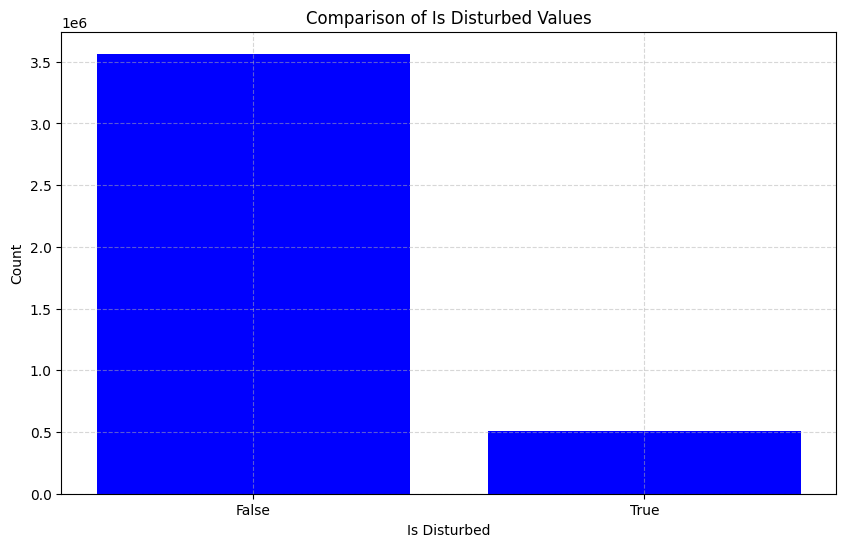

In [20]:
analysis.plot_disturbed_counts()

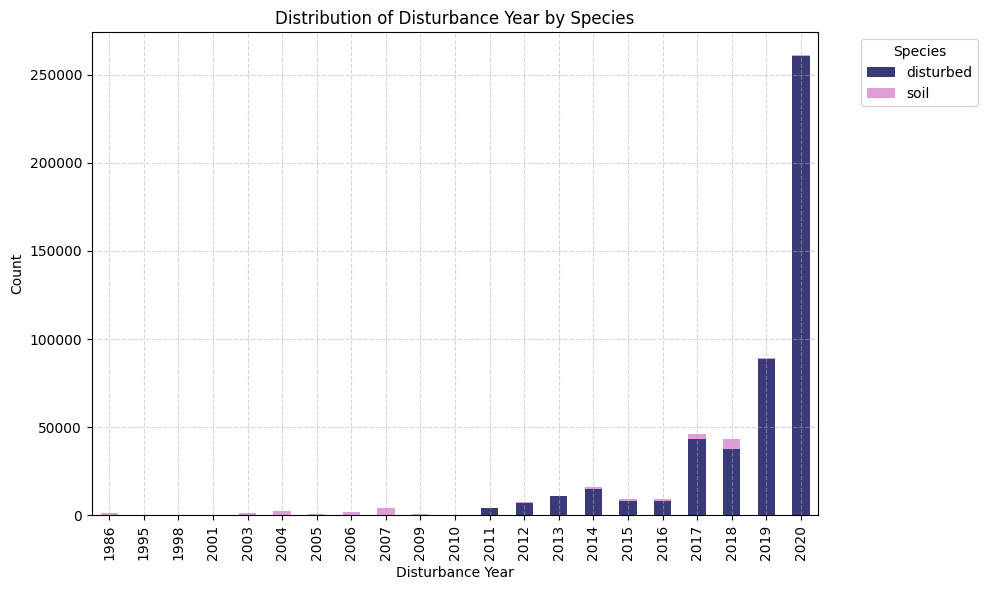

In [21]:
analysis.plot_disturbance_by_species()

## Explore Spectral-Bands

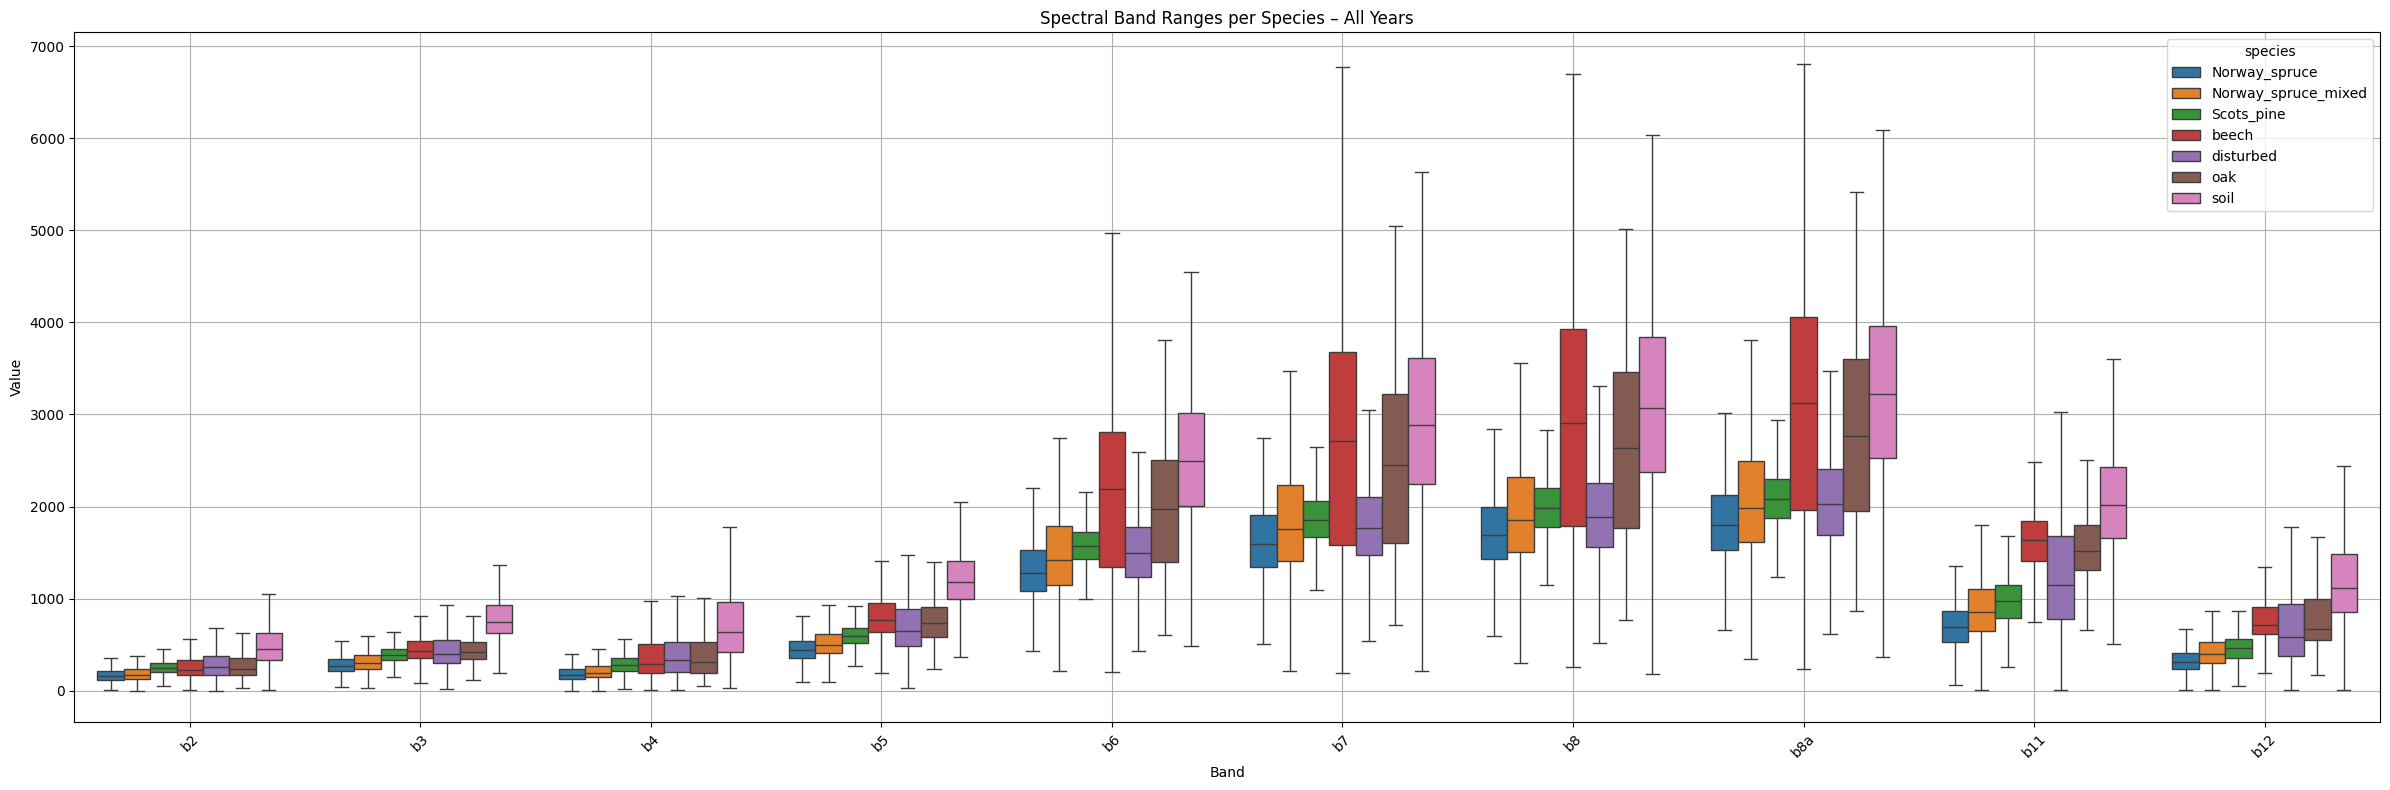

In [22]:
spectral = SpectralBandPlotter(df)
spectral.plot_all_years(sample_size=5000, showfliers=False)

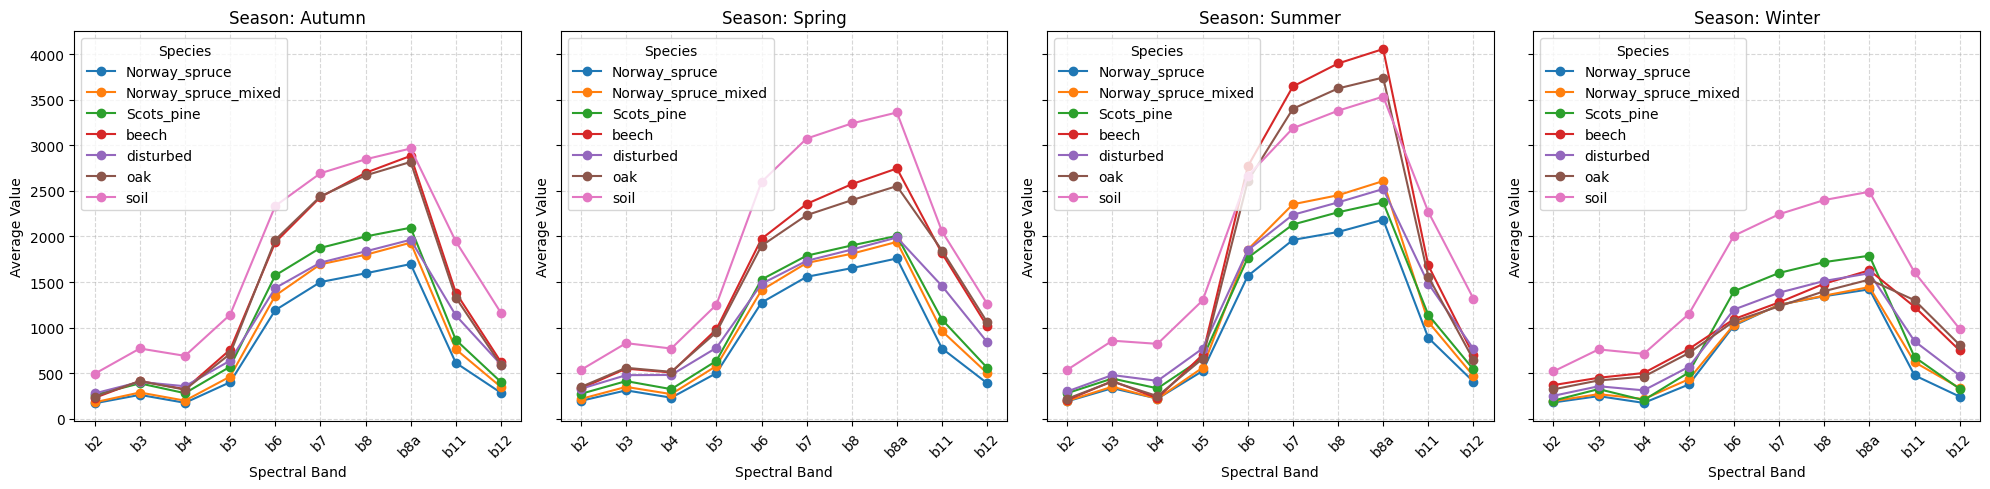

In [23]:
spectral.plot_species_season_distribution()

## Time Series Analysis

In the time series analysis, ID 10 is used as an example to demonstrate different aggregations and methods, which can later be applied to the entire dataset.


### Anomaly Detection

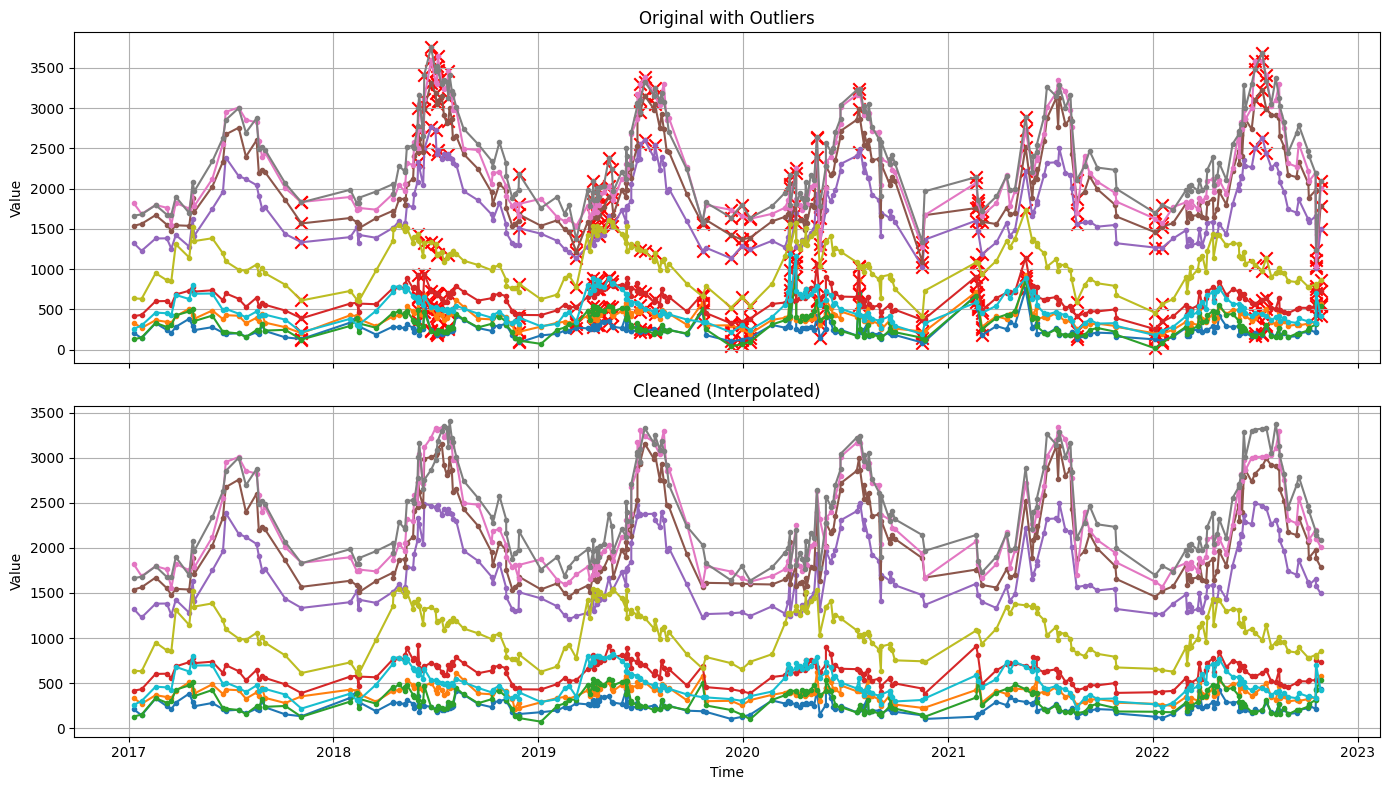

In [24]:
id_df = df[df["id"] == 10]
cleaner = SITSOutlierCleaner()
cleaner.fit_transform(id_df, band_columns=spectral_bands)
df_with_any_flag = cleaner.add_any_outlier_flag()
plot_with_outliers_subplot(df_with_any_flag, spectral_bands)

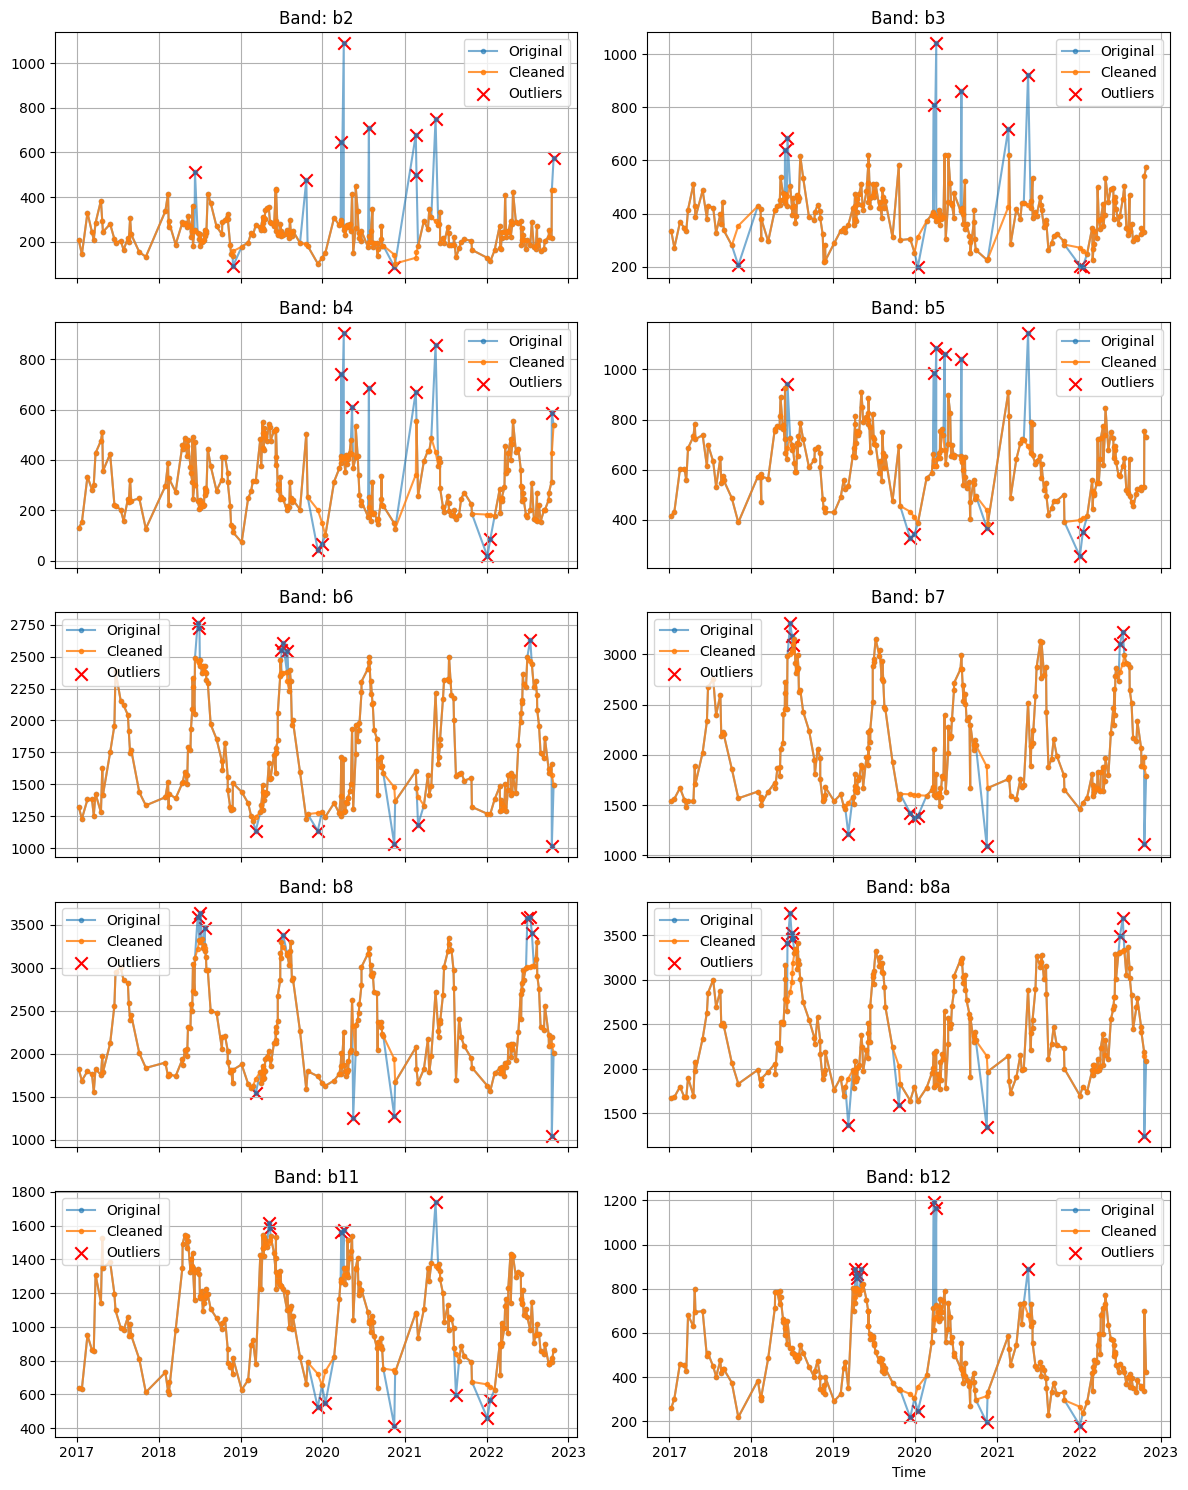

In [25]:
plot_outlier_detection_grid(df_with_any_flag, bands=spectral_bands)

In [26]:
score = cleaner.remaining_outliers_ratio()
print(f"Remaining outlier ratio (IsolationForest): {score:.2%}")

ratio = cleaner.zscore_outlier_ratio()
print(f"Outlier ratio (Z-Score method): {ratio:.2%}")


Remaining outlier ratio (IsolationForest): 18.87%
Outlier ratio (Z-Score method): 0.47%


Interpretation

Remaining outlier ratio (IsolationForest): Shows the percentage of records that the IsolationForest model still considers outliers after cleaning. A lower value means the cleaning was more effective in removing anomalies according to the model.

Outlier ratio (Z-Score method): Indicates the share of records that are statistical outliers (e.g., more than 3 standard deviations away from the mean in at least one feature). This gives a complementary, more “classical” perspective on how extreme your data points are.

### Time series progression

In [27]:
cleaned_id_df = cleaner.get_interpolated_only()
cleaned_id_df

,id,time,b2,b3,b4,b5,b6,b7,b8,b8a,b11,b12
2725825,10,2017-01-10,209.0,334.0,130.0,417.0,1323.0,1538.0,1819.0,1664.0,638.0,259.0
2725826,10,2017-01-24,144.0,271.0,152.0,433.0,1228.0,1563.0,1686.0,1680.0,632.0,302.0
2725827,10,2017-02-18,330.0,367.0,334.0,602.0,1381.0,1671.0,1797.0,1795.0,950.0,461.0
2725828,10,2017-03-10,245.0,346.0,282.0,605.0,1383.0,1553.0,1762.0,1677.0,863.0,453.0
2725829,10,2017-03-18,209.0,333.0,301.0,559.0,1254.0,1478.0,1554.0,1676.0,856.0,428.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2726032,10,2022-10-05,221.0,324.0,241.0,519.0,1617.0,2065.0,2222.0,2463.0,781.0,351.0
2726033,10,2022-10-06,252.0,346.0,269.0,531.0,1586.0,1888.0,2090.0,2411.0,782.0,359.0
2726034,10,2022-10-18,215.0,331.0,314.0,533.0,1656.0,1978.0,2197.0,2190.0,813.0,335.0
2726035,10,2022-10-19,430.0,540.0,427.0,754.0,1575.5,1883.0,2103.5,2140.5,792.0,701.0


In [28]:
cleaned_id_df = cleaner.get_interpolated_only()
ts_agg = TimeSeriesAggregate(cleaned_id_df)
df_2w = ts_agg.aggregate_timeseries(freq="1W", method="median")
dataloader = DataLoader()
df_2w_features = dataloader.date_feature_extraction(df_2w)

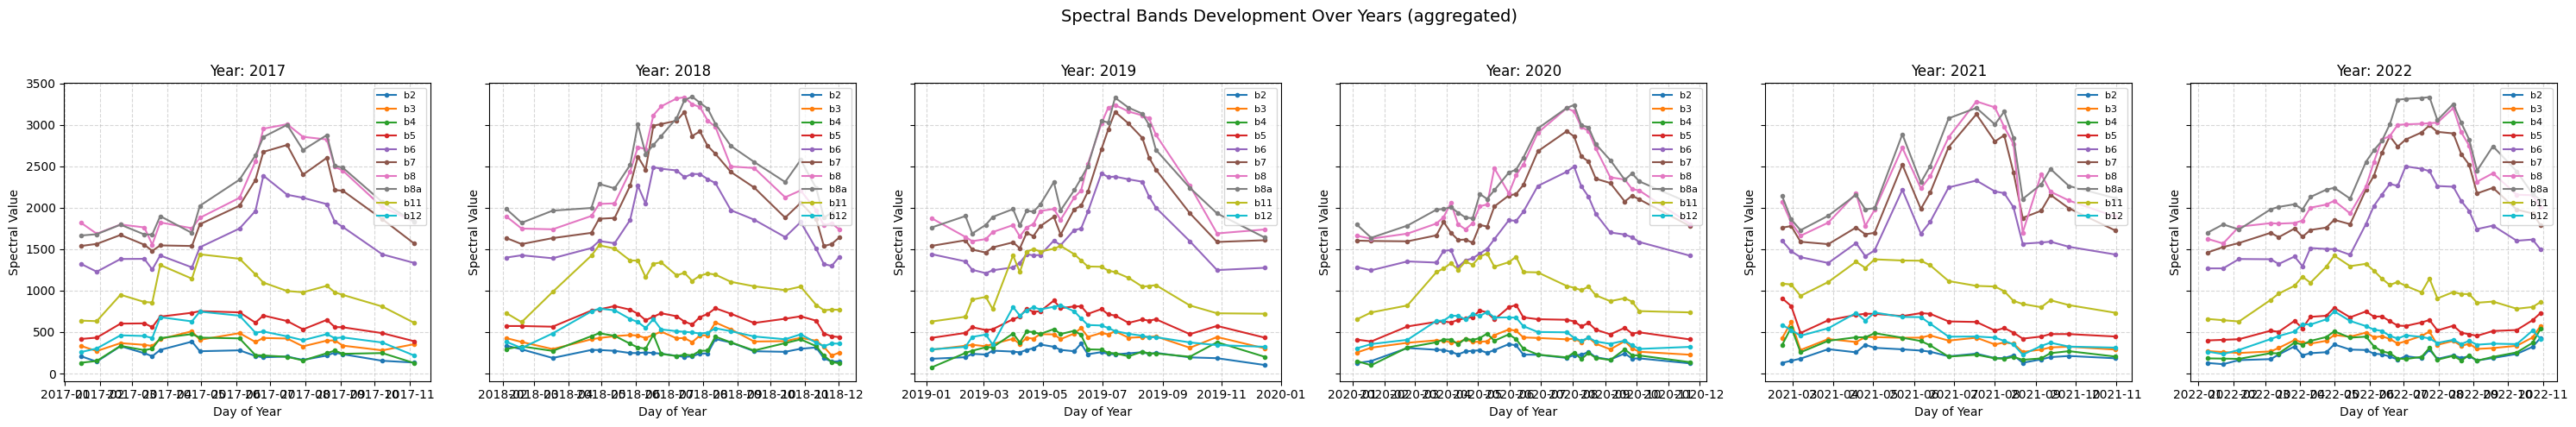

In [29]:
spectral = SpectralBandPlotter(df_2w_features)
spectral.plot_spectral_development_over_years(addition="aggregated")

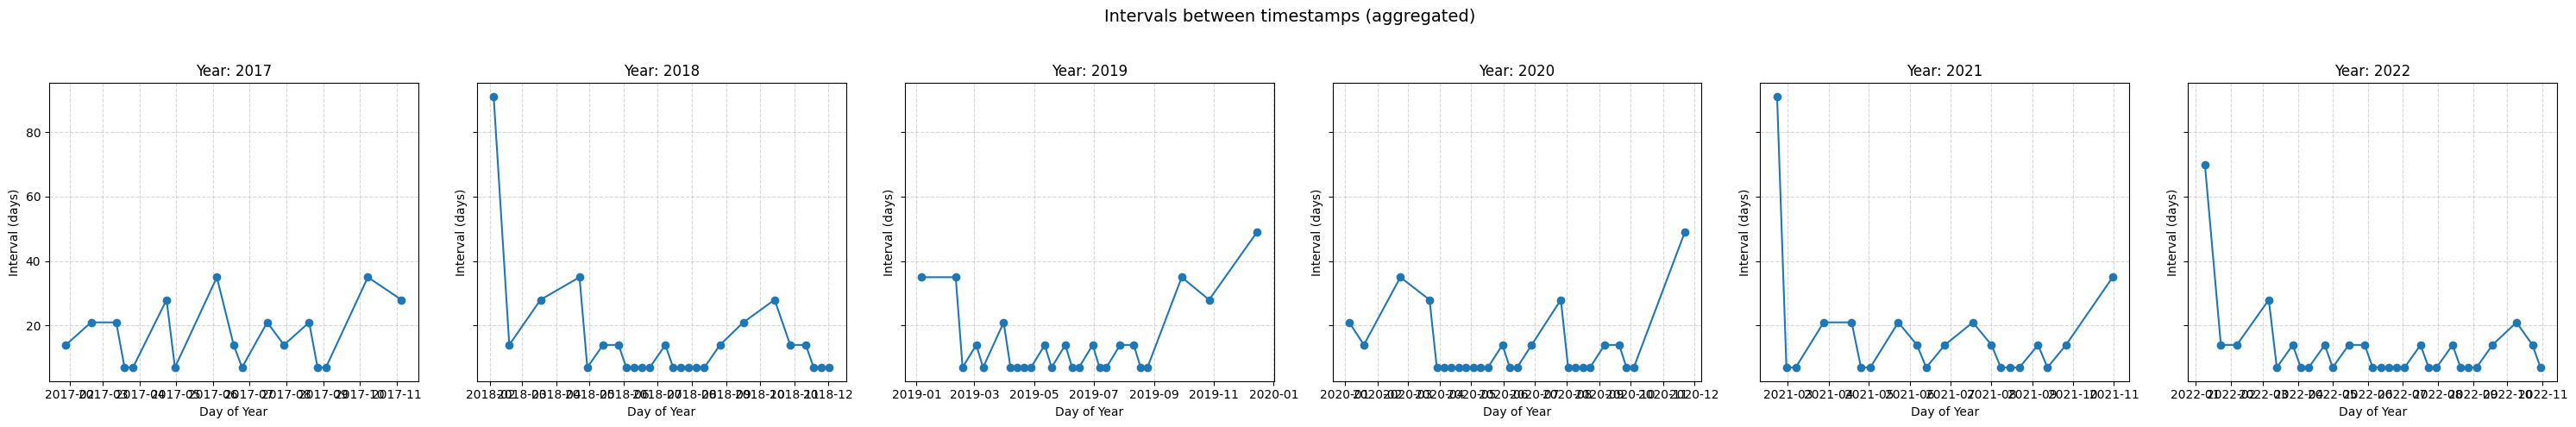

In [30]:
plot_intervals_timestamps(df_2w_features, addition="aggregated")

#### Autocorrelation

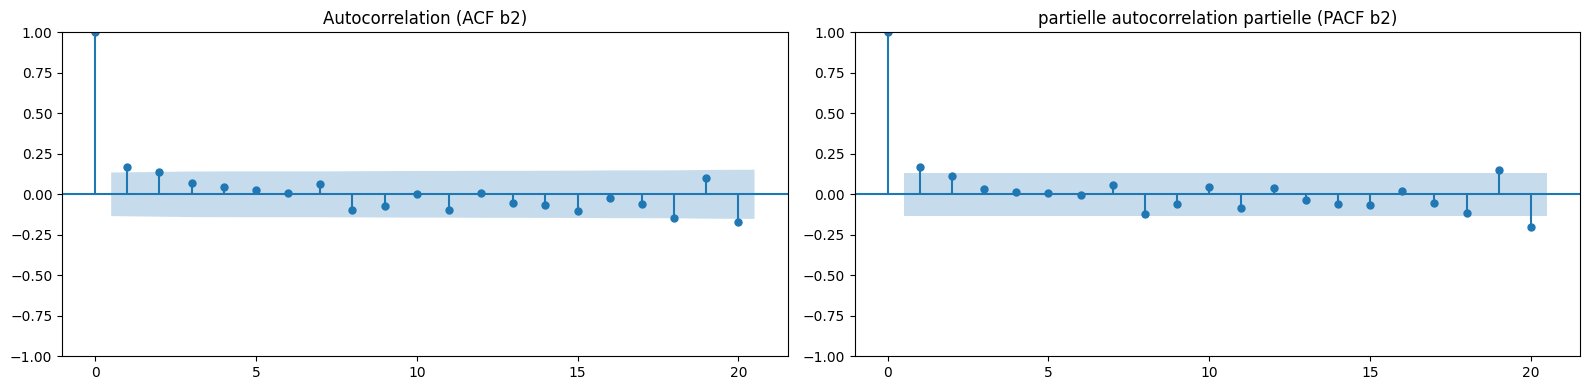

In [31]:
plot_autocorrelation(id_df, "b2")

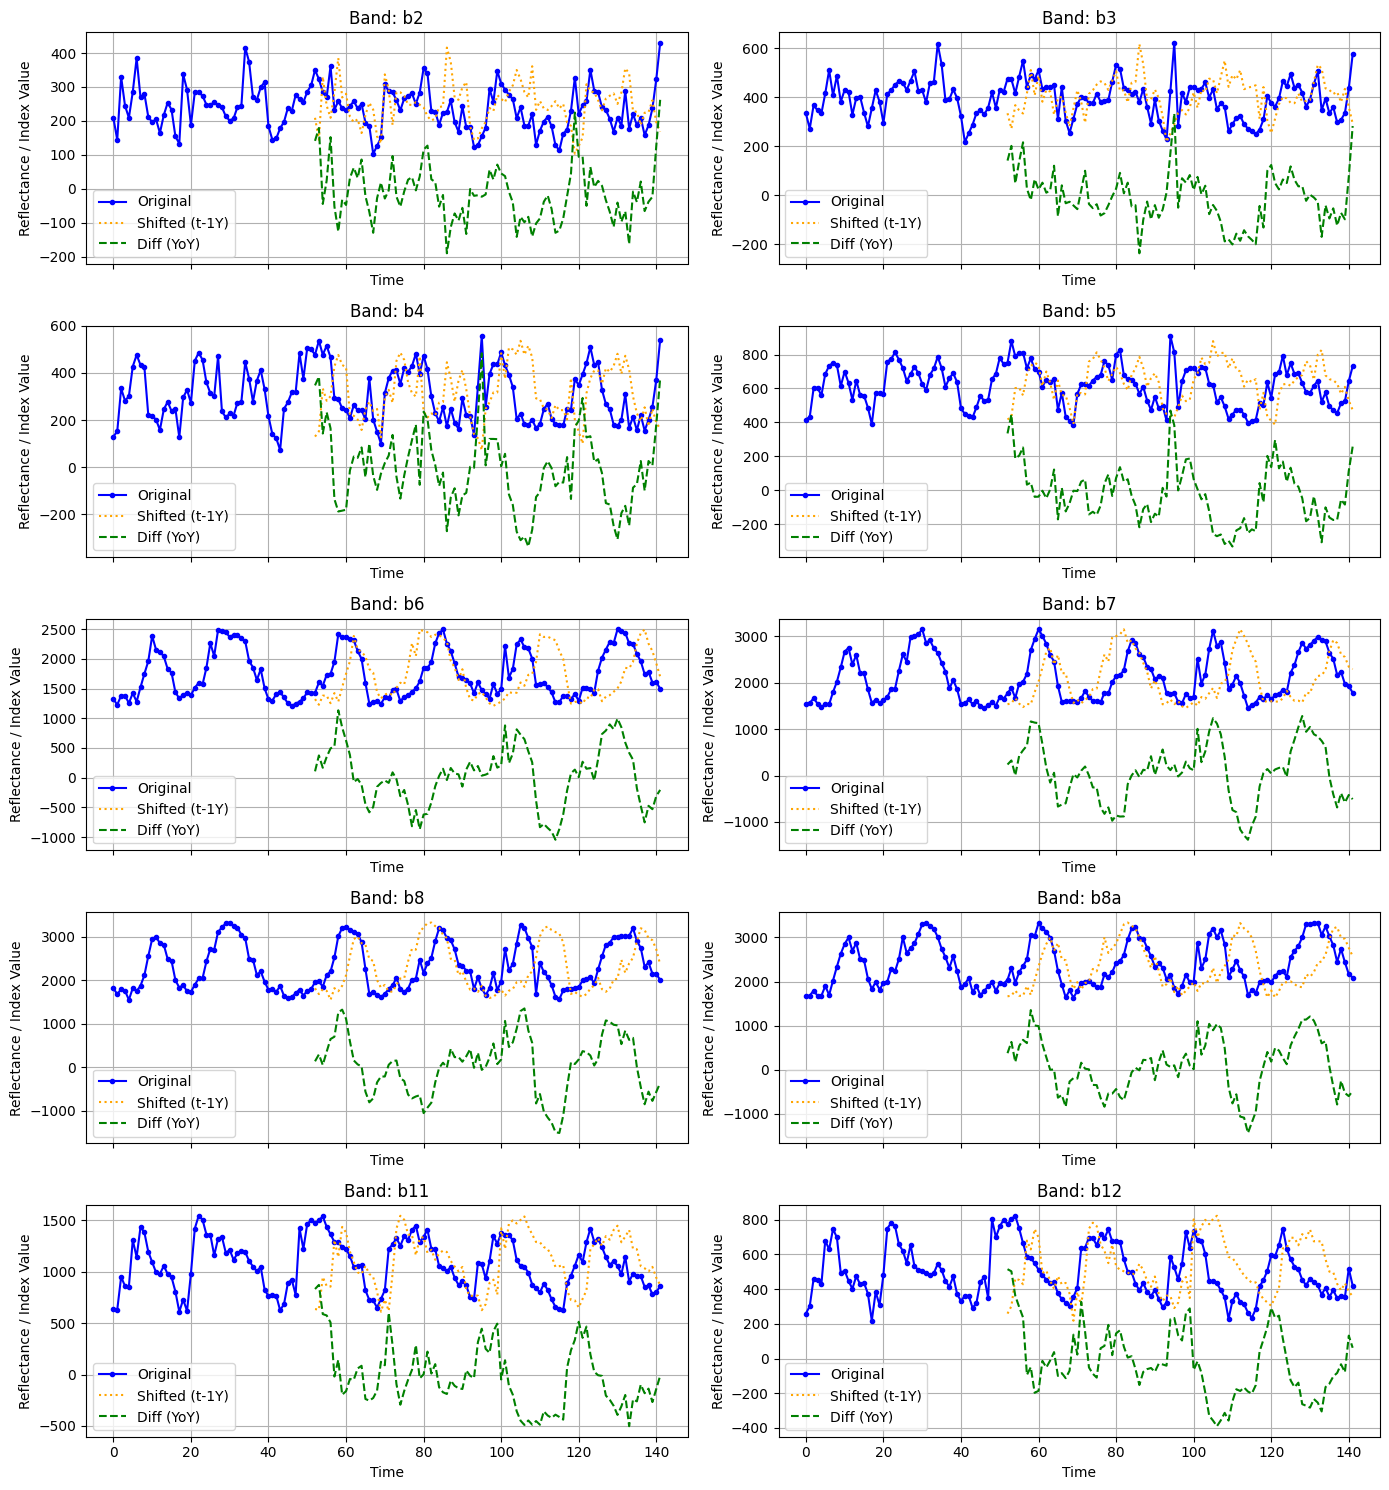

In [32]:
plot_band_differences(df_2w_features)